# Reading, displaying, and saving images

### Import Library

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

## Loading and saving an image

<font color = red>_We can load images in library in multiple ways with the help of OpenCV_</font>

In [53]:
img = cv2.imread('Photo.jpg')

## Image color spaces

In computer vision and image processing, color space refers to a specific way of
organizing colors. A color space is actually a combination of two things: a color model
and a mapping function. The reason we want color models is because it helps us in
representing pixel values using tuples. The mapping function maps the color model to the
set of all possible colors that can be represented.

There are many different color spaces that are useful. Some of the more popular color
spaces are RGB, YUV, HSV, Lab, and so on. Different color spaces provide different
advantages. We just need to pick the color space that’s right for the given problem. Let’s
take a couple of color spaces and see what information they provide:

- **RGB:** It’s probably the most popular color space. It stands for Red, Green, and Blue.
In this color space, each color is represented as a weighted combination of red, green,
and blue. So every pixel value is represented as a tuple of three numbers
corresponding to red, green, and blue. Each value ranges between 0 and 255.


- **YUV:** Even though RGB is good for many purposes, it tends to be very limited for
many real life applications. People started thinking about different methods to
separate the intensity information from the color information. Hence, they came up
with the YUV color space. Y refers to the luminance or intensity, and U/V channels
represent color information. This works well in many applications because the human
visual system perceives intensity information very differently from color information.


- **HSV:** As it turned out, even YUV was still not good enough for some of the
applications. So people started thinking about how humans perceive color and they
came up with the HSV color space. HSV stands for Hue, Saturation, and Value. This
is a cylindrical system where we separate three of the most primary properties of
colors and represent them using different channels. This is closely related to how the
human visual system understands color. This gives us a lot of flexibility as to how we
can handle images.

<font color = red>_from a color space in OpenCV. You will see a list of options available to convert to another. We can convert pretty much any color space into any other color space. Let us see how we can convert a color image to a grayscale image:_</font>

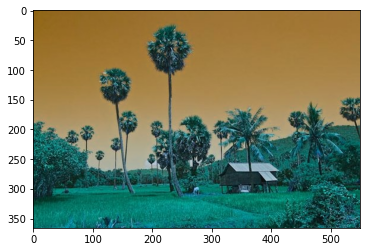

In [54]:
gray_img = cv2.imread('Photo.jpg', cv2.IMREAD_GRAYSCALE)
#gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

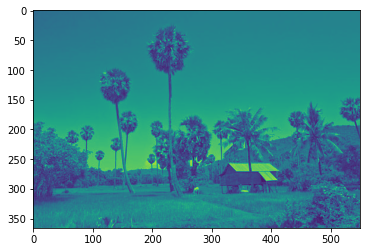

In [55]:
plt.imshow(gray_img)

In [4]:
cv2.imwrite('images/output.jpg', gray_img)

False

<font color = red>_We use the function cvtColor to convert between color spaces. now, we can see image convert to **YUV** By using the following flag:_</font>

### YUV

In [5]:
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

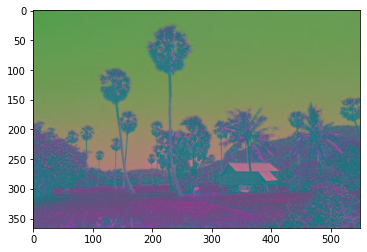

In [6]:
plt.imshow(yuv_img)

<font color = red>_we can separate out the three channels by slicing it._</font>

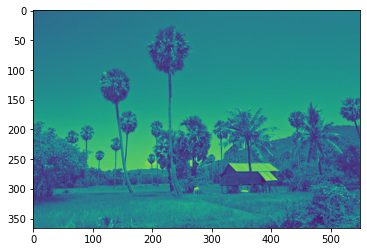

In [7]:
plt.imshow(yuv_img[:, :, 0])
#cv2.imshow('Y channel', yuv_img[:, :, 0])

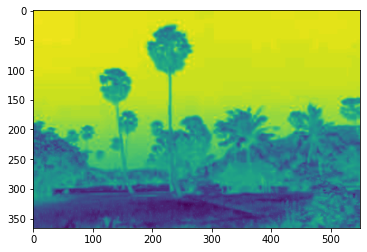

In [8]:
plt.imshow(yuv_img[:, :, 1])
#cv2.imshow('U channel', yuv_img[:, :, 1])

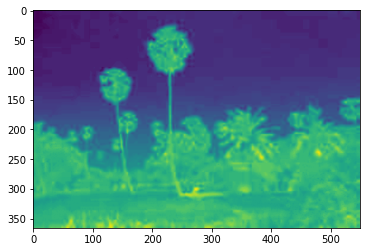

In [9]:
plt.imshow(yuv_img[:, :, 2])
#cv2.imshow('V channel', yuv_img[:, :, 2])

### HSV

<font color = red>_Let’s convert to **HSV** and see what happens:_</font>

In [10]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

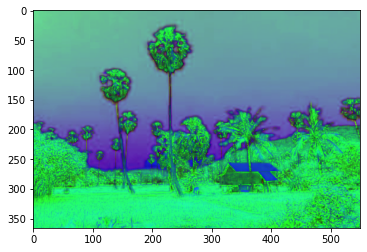

In [11]:
plt.imshow(hsv_img)
#cv2.imshow('HSV image', hsv_img)

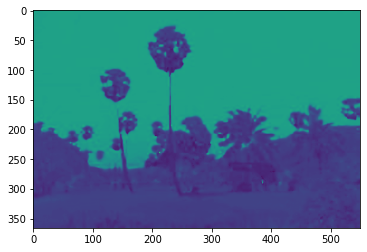

In [12]:
plt.imshow(hsv_img[:, :, 0])
#cv2.imshow('H channel', hsv_img[:, :, 0])

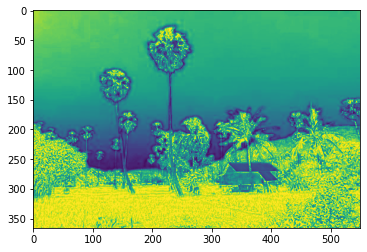

In [13]:
plt.imshow(hsv_img[:, :, 1])
#cv2.imshow('S channel', hsv_img[:, :, 1])

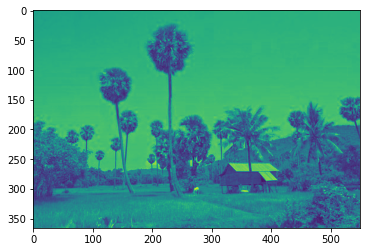

In [14]:
plt.imshow(hsv_img[:, :, 2])
#cv2.imshow('V channel', hsv_img[:, :, 2])

## Image translation

<font color = red>_In this section, we will discuss about shifting an image. Let’s say we want to move the
image within our frame of reference. In computer vision terminology, this is referred to as
**translation**._</font>

In [ ]:
num_rows, num_cols = img.shape[:2]

In [16]:
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))

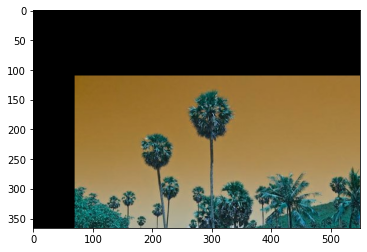

In [17]:
plt.imshow(img_translation)
#cv2.imshow('Translation', img_translation)

In [18]:
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))

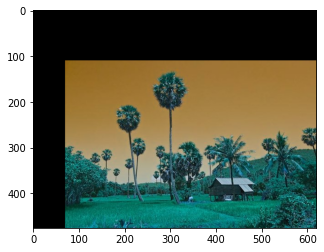

In [19]:
plt.imshow(img_translation)
#cv2.imshow('Translation', img_translation)

In [20]:
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix,(num_cols + 70 + 30, num_rows + 110 + 50))

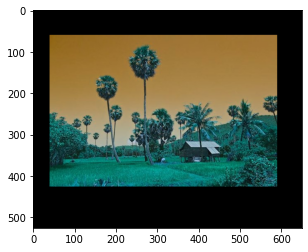

In [21]:
plt.imshow(img_translation)
#cv2.imshow('Translation', img_translation)

## Image rotation

In [22]:
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))

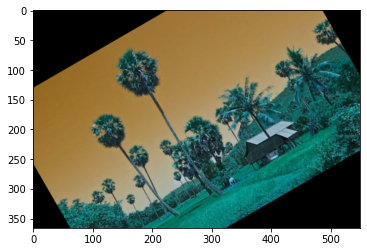

In [23]:
plt.imshow(img_rotation)
#cv2.imshow('Rotation', img_rotation)

In [24]:
translation_matrix = np.float32([ [1,0,int(0.5*num_cols)], [0,1,int(0.5*num_rows)] ])
2*num_cols, 2*num_rows
rotation_matrix = cv2.getRotationMatrix2D((num_cols, num_rows), 30, 1)
img_translation = cv2.warpAffine(img, translation_matrix, (2*num_cols, 2*num_rows))
img_rotation = cv2.warpAffine(img_translation, rotation_matrix, (2*num_cols, 2*num_rows)) 

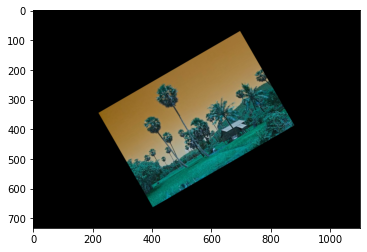

In [25]:
plt.imshow(img_rotation)
#cv2.imshow('Rotation', img_rotation)

## Image scaling

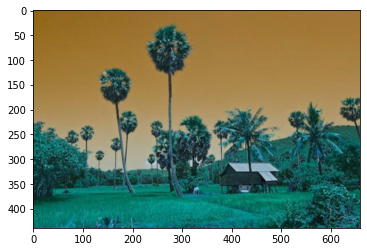

In [26]:
img_scaled = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_LINEAR)
plt.imshow(img_scaled)
#cv2.imshow('Scaling - Linear Interpolation', img_scaled)

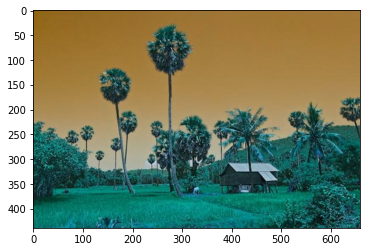

In [27]:
img_scaled = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_CUBIC)
plt.imshow(img_scaled)
#cv2.imshow('Scaling - Cubic Interpolation', img_scaled)

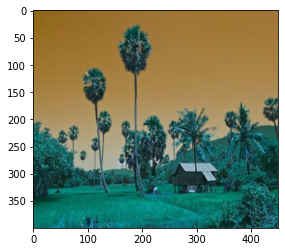

In [28]:
img_scaled = cv2.resize(img,(450, 400), interpolation = cv2.INTER_AREA)
plt.imshow(img_scaled)
#cv2.imshow('Scaling - Skewed Size', img_scaled)

## Affine transformations

In [29]:
rows, cols = img.shape[:2]

In [30]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))

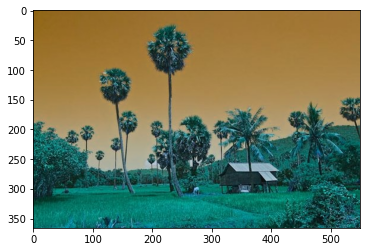

In [31]:
plt.imshow(img)
#cv2.imshow('Input', img)

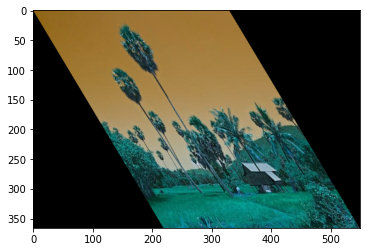

In [32]:
plt.imshow(img_output)
#cv2.imshow('Output', img_output)

## Mirorring

In [33]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[cols-1,0], [0,0], [cols-1,rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))

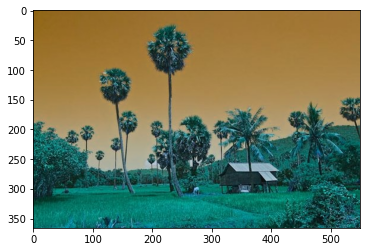

In [34]:
plt.imshow(img)
#cv2.imshow('Input', img)

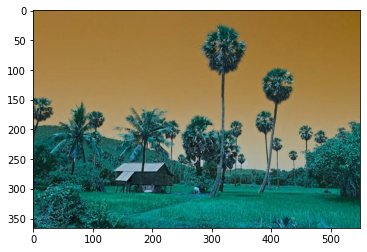

In [35]:
plt.imshow(img_output)
#cv2.imshow('Output', img_output)

## Projective transformations

In [36]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1], [int(0.66*cols),rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))

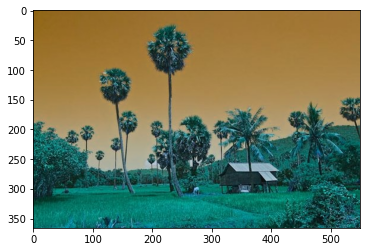

In [37]:
plt.imshow(img)
#cv2.imshow('Input', img)

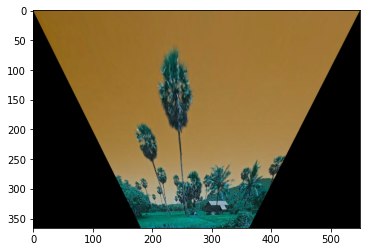

In [38]:
plt.imshow(img_output)
#cv2.imshow('Output', img_output)

In [39]:
src_points = np.float32([[0,0], [0,rows-1], [cols/2,0], [cols/2,rows-1]])
dst_points = np.float32([[0,100], [0,rows-101], [cols/2,0], [cols/2,rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))

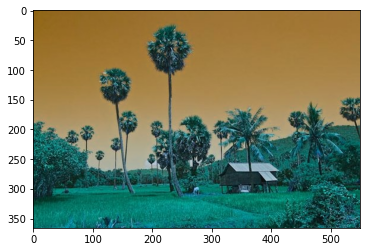

In [40]:
plt.imshow(img)
#cv2.imshow('Input', img)

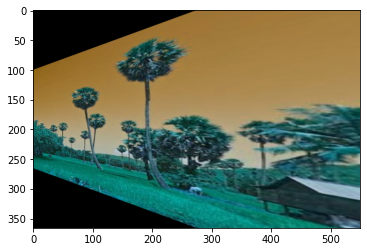

In [41]:
plt.imshow(img_output)
#cv2.imshow('Output', img_output)

## Image warping

In [42]:
img = cv2.imread('Photo.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

In [43]:
img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
        for j in range(cols):
            offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
            offset_y = 0
            if j+offset_x < rows:
                img_output[i,j] = img[i,(j+offset_x)%cols]
            else:
                img_output[i,j] = 0

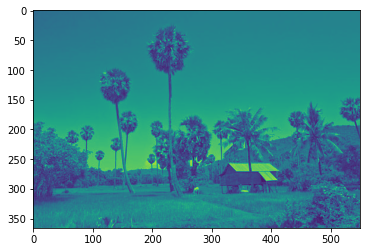

In [44]:
plt.imshow(img)
#cv2.imshow('Input', img)

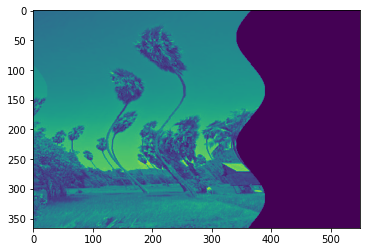

In [45]:
plt.imshow(img_output)
#cv2.imshow('Vertical wave', img_output)

In [46]:
img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0

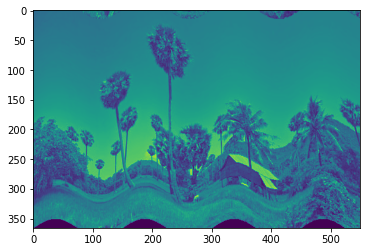

In [47]:
plt.imshow(img_output)
#cv2.imshow('Horizontal wave', img_output)

In [48]:
img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
    if i+offset_y < rows and j+offset_x < cols:
        img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
    else:
        img_output[i,j] = 0

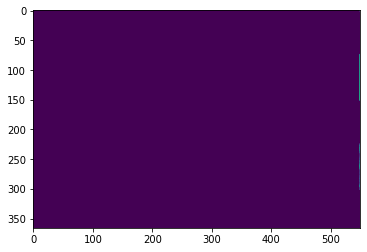

In [49]:
plt.imshow(img_output)
#cv2.imshow('Multidirectional wave', img_output)

In [50]:
img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 0
    if j+offset_x < cols:
        img_output[i,j] = img[i,(j+offset_x)%cols]
    else:
        img_output[i,j] = 0

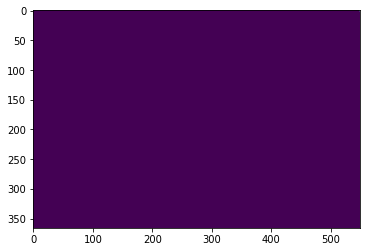

In [51]:
plt.imshow(img_output)
#cv2.imshow('Concave', img_output)